In [1]:
import cv2
import numpy as np
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def sift_features(images):
    sift = cv2.SIFT_create()
    keypoints_and_descriptors = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        keypoints_and_descriptors.append((kp, des))
    return keypoints_and_descriptors

def compare_features(kp_and_des_list):
    bf = cv2.BFMatcher()
    similarities = []
    for i in range(len(kp_and_des_list) - 1):
        matches = bf.knnMatch(kp_and_des_list[i][1], kp_and_des_list[i+1][1], k=2)
        # Apply ratio test
        good = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])
        similarities.append(len(good))
    return similarities

# Load images
folder_path = 'C:\\Users\\ilyas\\Desktop\\VIDEO2BLOG\\allframes'  # Make sure to adjust this path to your folder
images = load_images_from_folder(folder_path)

# Extract SIFT features
kp_and_des_list = sift_features(images)

# Compare features to get similarities
similarities = compare_features(kp_and_des_list)

# Similarities now contains the number of good matches between consecutive slides
print(similarities)


[0, 717, 1004, 318, 185, 757, 1362, 1327, 947, 1243, 1221, 1318, 763, 1094, 243, 70, 773, 1005, 628, 1381, 1432, 900, 1430, 1525, 1441, 306, 67, 1259, 766, 1583, 1638, 1645, 1557, 809, 1151, 1183, 93, 17, 50, 784, 851, 1413, 1429, 1490, 854, 1114, 1134, 861, 143, 168, 815, 394, 1252, 1160, 641, 1104, 1093, 745, 1669, 260, 160, 1208, 1502, 1544, 1173, 1596, 1682, 1030, 1040, 406, 76, 169, 1118, 1116, 1645, 1671, 1558, 2103, 2147, 1265, 1712, 274, 152, 1882, 270, 744, 456, 1703, 1750, 1781, 475, 1443, 301, 172, 1533, 1434, 1710, 1859, 1887, 2299, 2301, 1231, 1105, 219, 217, 1580, 1672, 2330, 2328, 2377, 2259, 1079, 91, 1340, 718, 529, 1505, 1629, 1599, 190, 1173, 1196, 707, 985, 646, 288, 144, 783, 1461, 368, 1013, 750, 1085, 660, 1080, 788, 680, 360, 1768, 1763, 1189, 1465, 998, 1039, 774, 1068, 801, 62, 47, 427, 1220, 788, 724, 1167, 1105, 843, 1304, 1343, 1258, 598, 403, 1375, 894, 1022, 1141, 724, 1049, 804, 1126, 750, 625, 502, 1405, 1417, 850, 1494, 1462, 1564, 1104, 1368, 1345, 55

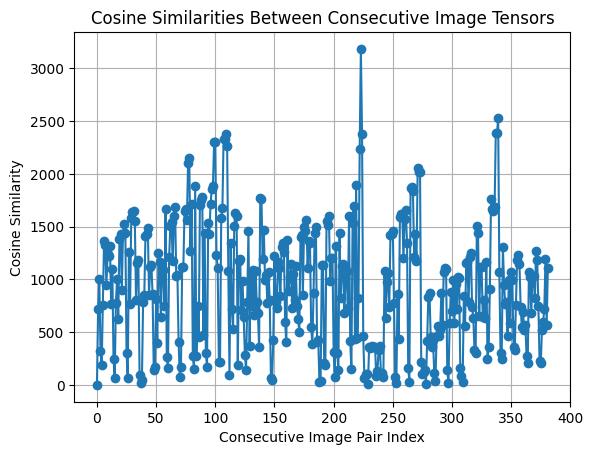

In [3]:
import matplotlib.pyplot as plt
plt.plot(similarities, marker='o', linestyle='-')
plt.title('Cosine Similarities Between Consecutive Image Tensors')
plt.xlabel('Consecutive Image Pair Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()